# Dive into Machine Learning

## Présentation du workshop


In [1]:
import pandas as pd
import numpy as np

# Algorithmes supérvisés

## Classification

In [2]:
from sklearn.datasets import load_iris

In [3]:
dataset_iris = load_iris()  #https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [4]:
print(dataset_iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
print("Les attributs des fleurs sont :",dataset_iris['feature_names'])
print("Les classes des fleurs sont :",dataset_iris['target_names'])
print("Taille du dataset d'attributs :",len(dataset_iris.data))
print("Taille du dataset de classes :",len(dataset_iris.data))

Les attributs des fleurs sont : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Les classes des fleurs sont : ['setosa' 'versicolor' 'virginica']
Taille du dataset d'attributs : 150
Taille du dataset de classes : 150


In [6]:
df_X = pd.DataFrame(dataset_iris['data'], columns=dataset_iris['feature_names'])
df_X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df_Y= pd.DataFrame(dataset_iris['target'])
print(df_Y.head())
print(df_Y.tail())

   0
0  0
1  0
2  0
3  0
4  0
     0
145  2
146  2
147  2
148  2
149  2


In [8]:
from sklearn.model_selection import train_test_split #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

In [9]:
X=dataset_iris.data
y=dataset_iris.target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

### KNN K-Nearest Neighbors ou K plus proches voisins

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
dir(KNeighborsClassifier)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_check_algorithm_metric',
 '_estimator_type',
 '_fit',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'predict',
 'predict_proba',
 'score',
 'set_params']

In [13]:
KNN_model = KNeighborsClassifier(n_neighbors= 7)

In [14]:
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [15]:
KNN_model.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')>

In [16]:
print("Précision de notre modèle sur le jeu de test :",round(KNN_model.score(X_test,y_test)*100,2),"%")

Précision de notre modèle sur le jeu de test : 96.67 %


In [17]:
from sklearn.metrics import classification_report #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report
from sklearn.metrics import confusion_matrix #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

In [18]:
print("Taille du jeu de test :",len(y_test))
print(classification_report(y_test, KNN_model.predict(X_test),target_names=dataset_iris.target_names))

Taille du jeu de test : 30
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.93      0.96        14

    accuracy                           0.97        30
   macro avg       0.97      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



In [19]:
print("La fleur de propriétés [0.0, 0.3, 7.8, 1.1] est de classe :", KNN_model.predict([[0.0, 0.3, 7.8, 1.1]])[0],"qui correspond à la classe", dataset_iris.target_names[KNN_model.predict([[0.0, 0.3, 7.8, 1.1]])[0]])

La fleur de propriétés [0.0, 0.3, 7.8, 1.1] est de classe : 2 qui correspond à la classe virginica


In [20]:
print("La fleur de propriétés [0.0, 0.3, 7.8, 1.1] a des probabilités de classification suivantes :", KNN_model.predict_proba([[0.0, 0.3, 7.8, 1.1]])[0])

La fleur de propriétés [0.0, 0.3, 7.8, 1.1] a des probabilités de classification suivantes : [0.         0.28571429 0.71428571]


In [21]:
from sklearn.neighbors import kneighbors_graph

KNN_graph = kneighbors_graph( [[0],[-1],[1],[4]], n_neighbors=2, mode="connectivity")
print(KNN_graph.toarray())

[[0. 1. 1. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [1. 0. 1. 0.]]


## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier #https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

In [23]:
dir(RandomForestClassifier)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_required_parameters',
 '_set_oob_score',
 '_validate_X_predict',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'decision_path',
 'feature_importances_',
 'fit',
 'get_params',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'set_params']

In [24]:
# Gini est utilisé par les arbres de type CART https://fr.wikipedia.org/wiki/Algorithme_CART 
RF_model_gini = RandomForestClassifier(n_estimators=20, criterion="gini", random_state= 1001)

# Gain est utilisé par les arbres ID3 et C4.5
RF_model_gain = RandomForestClassifier(n_estimators=20, criterion="entropy", random_state= 9897)

L'index de Gini ou le gain (aussi appellé entropie) se basent sur l'entropie de Shannon en théorie de l'information

Pour vous decider sur quelle arbre choisir:

![Types d'arbres de décision](https://qph.fs.quoracdn.net/main-qimg-fd3bd000bb9e904105b73fda2cc028bd-c)



In [25]:
print(RF_model_gini.fit(X_train,y_train))
print(classification_report(y_test,RF_model_gini.predict(X_test),target_names=dataset_iris.target_names))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=1001,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.93      0.96        14

    accuracy                           0.97        30
   macro avg       0.97      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



In [26]:
print(RF_model_gain.fit(X_train,y_train))
print(classification_report(y_test,RF_model_gain.predict(X_test),target_names=dataset_iris.target_names))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=9897,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.94      0.95      0.94        30
weighted avg       0.94      0.93      0.93        30



In [27]:
print("La fleur de propriétés [0.0, 0.3, 7.8, 1.1] a des probabilités de classification par une foret aléatoire basée avec des arbres basés sur le gain suivantes :", RF_model_gain.predict_proba([[0.0, 0.3, 7.8, 1.1]])[0])
print("La fleur de propriétés [0.0, 0.3, 7.8, 1.1] a des probabilités de classification par une foret aléatoire basée avec des arbres basés sur l'index Gini suivantes :", RF_model_gini.predict_proba([[0.0, 0.3, 7.8, 1.1]])[0])

La fleur de propriétés [0.0, 0.3, 7.8, 1.1] a des probabilités de classification par une foret aléatoire basée avec des arbres basés sur le gain suivantes : [0.   0.35 0.65]
La fleur de propriétés [0.0, 0.3, 7.8, 1.1] a des probabilités de classification par une foret aléatoire basée avec des arbres basés sur l'index Gini suivantes : [0.   0.25 0.75]


## Regression

In [28]:
dataset_house2rent = pd.read_csv("https://raw.githubusercontent.com/Omaroid/Dive-Into-Machine-Learning/master/data/houses_to_rent_v2.csv") #https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent/data?select=houses_to_rent_v2.csv
dataset_house2rent.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [29]:
dataset_house2rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le_city = LabelEncoder()
le_city.fit(dataset_house2rent["city"])

LabelEncoder()

In [32]:
list(le_city.classes_)

['Belo Horizonte', 'Campinas', 'Porto Alegre', 'Rio de Janeiro', 'São Paulo']

In [33]:
le_city.transform(dataset_house2rent["city"])

array([4, 4, 2, ..., 3, 3, 4])

In [34]:
dataset_house2rent["city"] = le_city.transform(dataset_house2rent["city"])

In [35]:
# Pour animal
le_animal= LabelEncoder()
le_animal.fit(dataset_house2rent["animal"])
print("Classes de notre LabelEncoder sur la colonnes 'animal':",list(le_animal.classes_))
le_animal.transform(dataset_house2rent["animal"])
dataset_house2rent["animal"] = le_animal.transform(dataset_house2rent["animal"])

# Pour furniture
le_furniture= LabelEncoder()
le_furniture.fit(dataset_house2rent["furniture"])
print("Classes de notre LabelEncoder sur la colonnes 'furniture':",list(le_furniture.classes_))
le_furniture.transform(dataset_house2rent["furniture"])
dataset_house2rent["furniture"] = le_furniture.transform(dataset_house2rent["furniture"])

Classes de notre LabelEncoder sur la colonnes 'animal': ['acept', 'not acept']
Classes de notre LabelEncoder sur la colonnes 'furniture': ['furnished', 'not furnished']


In [36]:
dataset_house2rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  int64 
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  int64 
 7   furniture            10692 non-null  int64 
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.1+ MB


In [37]:
dataset_house2rent.floor.unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

In [38]:
dataset_house2rent = dataset_house2rent[dataset_house2rent["floor"] != "-"]
dataset_house2rent.floor.unique()

array(['7', '20', '6', '2', '1', '4', '3', '10', '11', '24', '9', '8',
       '17', '18', '5', '13', '15', '16', '14', '26', '12', '21', '19',
       '22', '27', '23', '35', '25', '46', '28', '29', '301', '51', '32'],
      dtype=object)

In [39]:
dataset_house2rent["floor"] = pd.to_numeric(dataset_house2rent['floor'])

In [40]:
dataset_house2rent.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,4,70,2,1,1,7,0,0,2065,3300,211,42,5618
1,4,320,4,4,0,20,0,1,1200,4960,1750,63,7973
2,2,80,1,1,1,6,0,1,1000,2800,0,41,3841
3,2,51,2,1,0,2,0,1,270,1112,22,17,1421
4,4,25,1,1,0,1,1,1,0,800,25,11,836
6,3,72,2,1,0,7,0,1,740,1900,85,25,2750
7,4,213,4,4,4,4,0,1,2254,3223,1735,41,7253
8,4,152,2,2,1,3,0,0,1000,15000,250,191,16440
9,3,35,1,1,0,2,0,0,590,2300,35,30,2955
10,4,26,1,1,0,2,0,0,470,2100,150,27,2747


In [41]:
X_train, X_test, y_train, y_test  = train_test_split(dataset_house2rent.iloc[:,:-1], dataset_house2rent.iloc[:,-1:], test_size=0.2, random_state=3000)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
LR_model = LinearRegression() 

In [44]:
LR_model.fit(X_train,y_train)
print(len(X_train))
print(len(y_train))

6584
6584


In [45]:
print("Précision de notre modèle sur le jeu de test :",round(LR_model.score(X_test,y_test)*100,2),"%")

Précision de notre modèle sur le jeu de test : 100.0 %


In [46]:
LR_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [47]:
from matplotlib import pyplot as plt

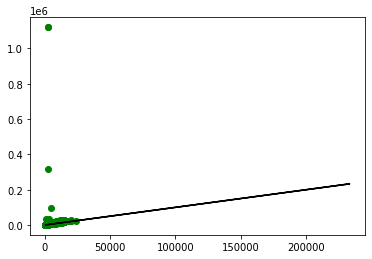

In [48]:
plt.scatter(X_train['rent amount (R$)'],y_train,color='g')
plt.plot(y_test, LR_model.predict(X_test),color='k')

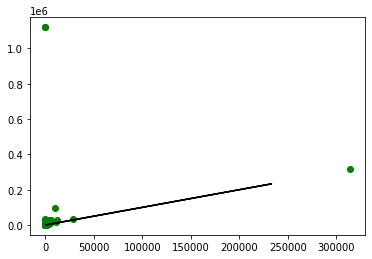

In [49]:
plt.scatter(X_train['property tax (R$)'],y_train,color='g')
plt.plot(y_test, LR_model.predict(X_test),color='k')

## Clustering


## K-means


In [50]:
from sklearn.cluster import KMeans

In [51]:
KM_model = KMeans(n_clusters=2)

# Reduction de dimention

In [74]:
X=dataset_iris.data
y=dataset_iris.target

In [53]:
print(X[0:5,])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [54]:
from sklearn.preprocessing import StandardScaler #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

In [75]:
SS = StandardScaler()
SS.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [56]:
print(SS.mean_)

[5.84333333 3.05733333 3.758      1.19933333]


In [57]:
print(SS.var_)

[0.68112222 0.18871289 3.09550267 0.57713289]


In [76]:
X = SS.transform(X)

**transform** remplace chaque element par sa valeur centrée reduite correspondante

In [59]:
print(X[0:5,])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [60]:
from sklearn.decomposition import PCA

In [77]:
PCA_model = PCA(n_components=2)

In [78]:
PCA_principalComponents = PCA_model.fit_transform(X)

In [79]:
PCA_dataset = pd.DataFrame(data = PCA_principalComponents, columns = ['Composante principale 1', 'Composante principale 2'])

In [64]:
y = pd.DataFrame(y, columns=["y"])
PCA_final = pd.concat([PCA_dataset, y], axis = 1)

In [65]:
PCA_final.head()

,Composante principale 1,Composante principale 2,y
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


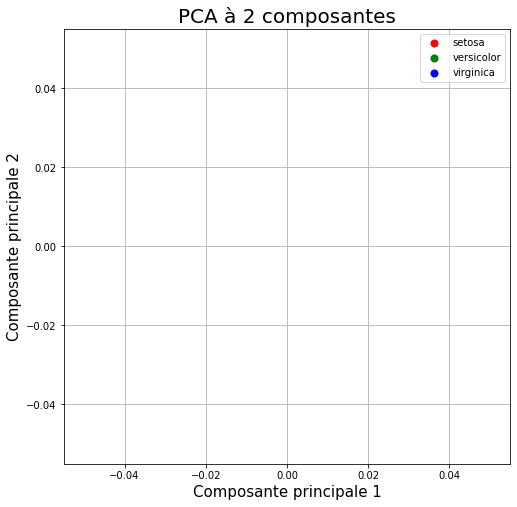

In [66]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Composante principale 1', fontsize = 15)
ax.set_ylabel('Composante principale 2', fontsize = 15)
ax.set_title('ACP à 2 composantes', fontsize = 20)

colors = ['r', 'g', 'b']
for target, color in zip(dataset_iris.target_names,colors):
    indicesToKeep = PCA_final['y'] == target
    ax.scatter(PCA_final.loc[indicesToKeep,'Composante principale 1']
               , PCA_final.loc[indicesToKeep, 'Composante principale 2']
               , c = color
               , s = 50)
ax.legend(dataset_iris.target_names)
ax.grid()

Text(0.5, 1.0, 'PCA of IRIS dataset')

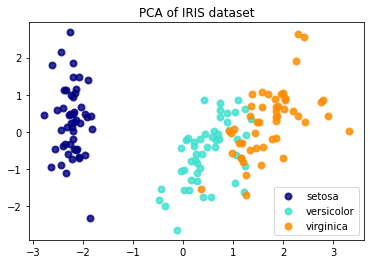

In [80]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], dataset_iris.target_names):
    plt.scatter(PCA_principalComponents[y == i, 0], PCA_principalComponents[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

In [73]:
iris = load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

X_r

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,